In [1]:
import numpy as np
from collections import OrderedDict

# auROC calculation given motif and importance scores

### Load importance scores

In [2]:
#Scores for sequence number 6000 - 8000
impscore = np.load("/users/eprakash/newlsgkm/lsgkm/mytests/talgata/runs/talgata_t3_l6_k5_d1_g2.0_c10/ISM_importance_scores_TALGATA_task0.test.2000.npy")
impscore.shape

(2000, 200, 4)

In [3]:
#IG Scores for sequence number 6000 - 8000
igimpscore = np.load("/users/eprakash/newlsgkm/lsgkm/mytests/talgata/runs/talgata_t3_l6_k5_d1_g2.0_c10/IG_TALGATA_test.2000.npy")
igimpscore.shape

(2000, 200, 4)

###  Load sequences and motif info

In [4]:
import simdna.synthetic as synthetic
import gzip

data_filename = "sequences.simdata.gz"
data = synthetic.read_simdata_file(data_filename)
l = data.embeddings[6781]
for i in l:
    print(i.startPos, i.what.__dict__, len(i.what), i.what.getDescription())
    print(data.sequences[215])

(71, {'string': 'CTAGATAAGG', 'stringDescription': 'GATA_disc1'}, 10, 'GATA_disc1')
CGCCAACAGATGGTAACCGGCCTCATAGACCCTAGACATTGGTCATAGTGGGGCGCGACTGATTGTGAGGCTATGTTTAAACGGTCCCTCGGCCGCTACAGAGGCTAAGTAGGACAACTCTCGGAGGGAATACATAAACCAATTGGTGGCCGTATTCATTCACCCCAACAACCCAGGTGGCAACAGCTGGTACCCGACTG
(46, {'string': 'GGTGATAAGG', 'stringDescription': 'GATA_disc1'}, 10, 'GATA_disc1')
CGCCAACAGATGGTAACCGGCCTCATAGACCCTAGACATTGGTCATAGTGGGGCGCGACTGATTGTGAGGCTATGTTTAAACGGTCCCTCGGCCGCTACAGAGGCTAAGTAGGACAACTCTCGGAGGGAATACATAAACCAATTGGTGGCCGTATTCATTCACCCCAACAACCCAGGTGGCAACAGCTGGTACCCGACTG
(184, {'string': 'CCGAACAGATGGATGT', 'stringDescription': 'TAL1_known1'}, 16, 'TAL1_known1')
CGCCAACAGATGGTAACCGGCCTCATAGACCCTAGACATTGGTCATAGTGGGGCGCGACTGATTGTGAGGCTATGTTTAAACGGTCCCTCGGCCGCTACAGAGGCTAAGTAGGACAACTCTCGGAGGGAATACATAAACCAATTGGTGGCCGTATTCATTCACCCCAACAACCCAGGTGGCAACAGCTGGTACCCGACTG
(167, {'string': 'ACGAACAGATGGCCAG', 'stringDescription': 'TAL1_known1'}, 16, 'TAL1_known1')
CGCCAACAGATGGTAACCGGCCTCATAGACCCTAGACATTGGT

### Create ordered dictionary of sequence names to motif list 

In [5]:
seq2motiflist = OrderedDict()
i = 6000
seqnamelist = list()
for motiflist in data.embeddings[6000:8000]:
    seqname = "seq_" + str(i)
    seqnamelist.append(seqname)
    seq2motiflist[seqname] = list()
    for el in motiflist:
        d = dict()
        d['begin'] = el.startPos
        d['end'] = el.startPos + len(el.what)
        d['motif'] = el.what.getDescription()
        seq2motiflist[seqname].append(d)
    i = i+1
#print(seq2motiflist)

### Use importance score evaluator to get motif-sized-window scores and corresponding labels for auROC calc

In [6]:
from ssvmimp.impevaluator.motif_importance_score_evaluator import MotifImportanceScoreEvaluator

#print(seqnamelist)
seqnames = np.array(seqnamelist)
#print(seqnames)
print(seqnames.shape)
impscoreeval = MotifImportanceScoreEvaluator(seq2motiflist, seqnames, impscore)
print("Known motifs" + str(impscoreeval.get_known_motifs()))

print("Motif size for TAL1_known1  " + str(impscoreeval.get_motif_size('TAL1_known1')))
print("Motif size for GATA_disc1  " + str(impscoreeval.get_motif_size('GATA_disc1')))

(2000,)
Known motifs['GATA_disc1', 'TAL1_known1']
Motif size for TAL1_known1  16
Motif size for GATA_disc1  10


In [7]:
(scores, labels) = impscoreeval.get_motif_scores('TAL1_known1')
print("Scores shape: ", scores.shape)
print("Labels shape: ", labels.shape)

('Scores shape: ', (283872,))
('Labels shape: ', (283872,))


### Perform auROC and auPRC calculations using scores and labels

In [8]:
from sklearn import metrics

ismauroc = metrics.roc_auc_score(labels, scores)
ismauprc = metrics.average_precision_score(labels, scores)
print("auROC is: " + str(ismauroc))
print("auPRC is: " + str(ismauprc))

auROC is: 0.9266282467655568
auPRC is: 0.30957474976603494


In [9]:
ismfpr, ismtpr, ismrocthresholds = metrics.roc_curve(labels, scores, pos_label=1)
ismprecision, ismrecall, ismprcthresholds = metrics.precision_recall_curve(labels, scores)

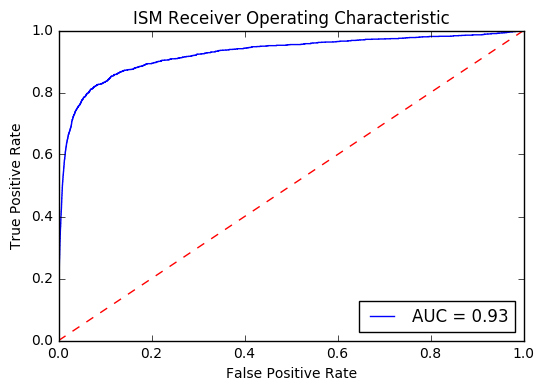

In [10]:
import matplotlib.pyplot as plt
plt.title('ISM Receiver Operating Characteristic')
plt.plot(ismfpr, ismtpr, 'b', label = 'AUC = %0.2f' % ismauroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

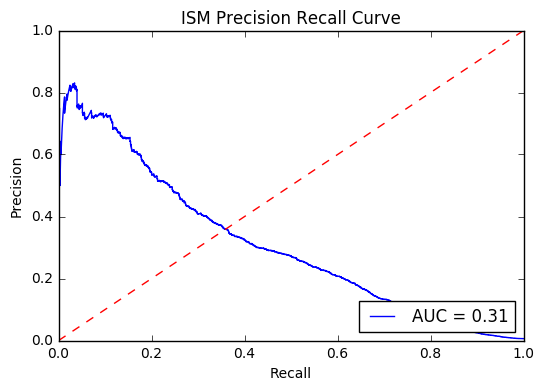

In [11]:
plt.title('ISM Precision Recall Curve')
plt.plot(ismrecall, ismprecision, 'b', label = 'AUC = %0.2f' % ismauprc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### Do the same for IG

In [12]:
from ssvmimp.impevaluator.motif_importance_score_evaluator import MotifImportanceScoreEvaluator

#print(seqnamelist)
seqnames = np.array(seqnamelist)
#print(seqnames)
print(seqnames.shape)
impscoreeval = MotifImportanceScoreEvaluator(seq2motiflist, seqnames, igimpscore)
print("Known motifs" + str(impscoreeval.get_known_motifs()))

print("Motif size for TAL1_known1  " + str(impscoreeval.get_motif_size('TAL1_known1')))
print("Motif size for GATA_disc1  " + str(impscoreeval.get_motif_size('GATA_disc1')))

(2000,)
Known motifs['GATA_disc1', 'TAL1_known1']
Motif size for TAL1_known1  16
Motif size for GATA_disc1  10


In [13]:
(scores, labels) = impscoreeval.get_motif_scores('TAL1_known1')
print("Scores shape: ", scores.shape)
print("Labels shape: ", labels.shape)

('Scores shape: ', (283872,))
('Labels shape: ', (283872,))


In [14]:
igauroc = metrics.roc_auc_score(labels, scores)
igauprc = metrics.average_precision_score(labels, scores)
print("auROC is: " + str(igauroc))
print("auPRC is: " + str(igauprc))

auROC is: 0.9866475298321802
auPRC is: 0.45297678982329515


In [15]:
igfpr, igtpr, igrocthresholds = metrics.roc_curve(labels, scores, pos_label=1)
igprecision, igrecall, igprcthresholds = metrics.precision_recall_curve(labels, scores)

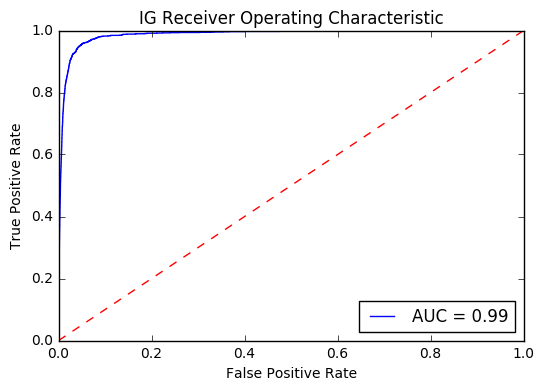

In [16]:
plt.title('IG Receiver Operating Characteristic')
plt.plot(igfpr, igtpr, 'b', label = 'AUC = %0.2f' % igauroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

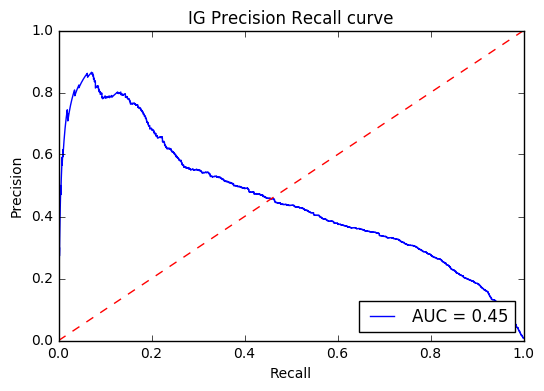

In [17]:
plt.title('IG Precision Recall curve')
plt.plot(igrecall, igprecision, 'b', label = 'AUC = %0.2f' % igauprc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

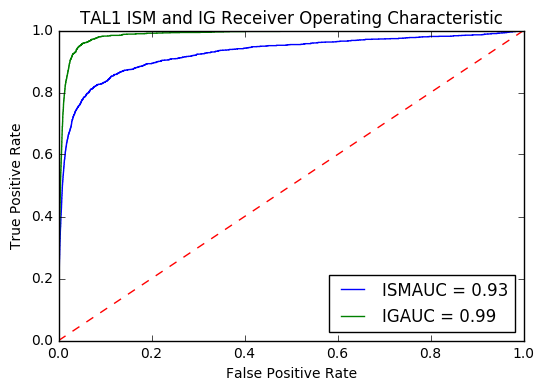

In [18]:
plt.title('TAL1 ISM and IG Receiver Operating Characteristic')
plt.plot(ismfpr, ismtpr, 'b', label = 'ISMAUC = %0.2f' % ismauroc)
plt.plot(igfpr, igtpr, 'g', label = 'IGAUC = %0.2f' % igauroc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

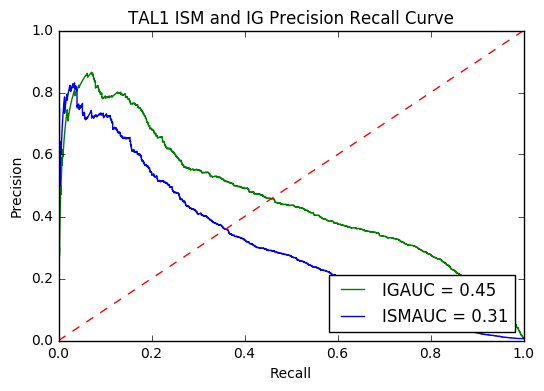

In [19]:
plt.title('TAL1 ISM and IG Precision Recall Curve')
plt.plot(igrecall, igprecision, 'g', label = 'IGAUC = %0.2f' % igauprc)
plt.plot(ismrecall, ismprecision, 'b', label = 'ISMAUC = %0.2f' % ismauprc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()